# Imports

In [78]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime

import warnings

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [54]:
data = pd.read_csv('data/dataset.csv')
data = data.sort_values(['timestamp'])

In [55]:
data.head()

,user_id,item_id,rating,timestamp
217,259,255,4,874724710
83968,259,286,4,874724727
43030,259,298,4,874724754
21399,259,185,4,874724781
82658,259,173,4,874724843


# 1. Feature and its values

In [57]:
print('Unique values for X (user_id): {}'.format(data['user_id'].unique().shape[0]))
print('Unique values for y (item_id): {}'.format(data['item_id'].unique().shape[0]))

Unique values for X (user_id): 944
Unique values for y (item_id): 1682


In [58]:
data['date'] = [datetime.fromtimestamp(x) for x in data['timestamp']]

In [59]:
data.dtypes

user_id               int64
item_id               int64
rating                int64
timestamp             int64
date         datetime64[ns]
dtype: object

# 2. Feature processing

Let's get some information from our datetime feature.

### Datetime vars 

In [73]:
def extracting_time_values(df, date_col):
    # year
    df['year'] = df[date_col].dt.year
    # month
    df['month'] = df[date_col].dt.month
    # day
    df['day'] = df[date_col].dt.day
    # hour
    df['hour'] = df[date_col].dt.hour
    # minute
    df['minute'] = df[date_col].dt.minute
    # second
    df['second'] = df[date_col].dt.second
    
    # Other time values
    # season
    seasons = ['spring', 'summer', 'autumn', 'winter']
    months_to_season = {3: seasons[0], 4: seasons[0], 5: seasons[0], 
                        6: seasons[1], 7: seasons[1], 8: seasons[1], 
                        9: seasons[2], 10: seasons[2], 11: seasons[2], 
                        12: seasons[3], 1: seasons[3], 2: seasons[3]}
    df['season'] = df['month'].map(months_to_season)
    
    # weekday
    df['weekday'] = df[date_col].dt.weekday
    # weekday and weekend
    day_type_map = {}
    # 0 is Monday, 6 is Sunday
    for i in range(7):
        if i <= 4:
            day_type_map[i] = 'work' #weekday
        else:
            day_type_map[i] = 'rest' #weekend
            
    df['day_type'] = df['weekday'].map(day_type_map)
    
    # day period
    day_period_map = {}
    for i in range(24):
        if i <= 5:
            day_period_map[i] = 'night'
        elif i >= 6 and i <= 11:
            day_period_map[i] = 'morning'
        elif i >= 12 and i <= 17:
            day_period_map[i] = 'afternoon'
        else:
            day_period_map[i] = 'evening'
    
    df['day_period'] = df['hour'].map(day_period_map)
    
    

In [74]:
extracting_time_values(data, 'date')

In [62]:
pd.get_dummies(data[['day_type', 'season']]).head()

,day_type_rest,day_type_work,season_autumn,season_spring,season_winter
217,1,0,1,0,0
83968,1,0,1,0,0
43030,1,0,1,0,0
21399,1,0,1,0,0
82658,1,0,1,0,0


In [75]:
data.head()

,user_id,item_id,rating,timestamp,date,year,month,day,hour,minute,second,season,weekday,day_type,day_period
217,259,255,4,874724710,1997-09-20 07:05:10,1997,9,20,7,5,10,autumn,5,rest,morning
83968,259,286,4,874724727,1997-09-20 07:05:27,1997,9,20,7,5,27,autumn,5,rest,morning
43030,259,298,4,874724754,1997-09-20 07:05:54,1997,9,20,7,5,54,autumn,5,rest,morning
21399,259,185,4,874724781,1997-09-20 07:06:21,1997,9,20,7,6,21,autumn,5,rest,morning
82658,259,173,4,874724843,1997-09-20 07:07:23,1997,9,20,7,7,23,autumn,5,rest,morning


In [76]:
for c in ['year', 'month', 'day', 'season', 'weekday', 'day_type', 'day_period', 'hour']:
    print('for variable "{}" unique values are: {}'.format(c, sorted(list(data[c].unique()))))

for variable "year" unique values are: [1997, 1998]
for variable "month" unique values are: [1, 2, 3, 4, 9, 10, 11, 12]
for variable "day" unique values are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
for variable "season" unique values are: ['autumn', 'spring', 'winter']
for variable "weekday" unique values are: [0, 1, 2, 3, 4, 5, 6]
for variable "day_type" unique values are: ['rest', 'work']
for variable "day_period" unique values are: ['afternoon', 'evening', 'morning', 'night']
for variable "hour" unique values are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


### Rating var

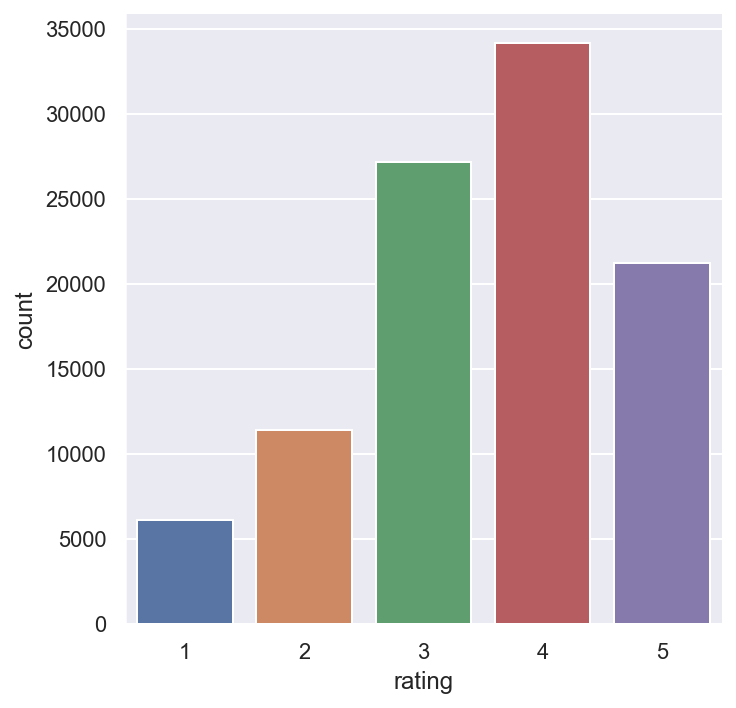

In [84]:
sns.catplot(x='rating', data=data, kind='count')

In [ ]:
def extrating_rating_values(df, rat_col):
    # grading
    rating_map = {1: 'low', 2: 'low',
                  3: 'medium',
                  4: 'avg',
                  5: 'high'}
    
    df['rating_grading'] = df[rat_col].map(rating_map)
    
    # avg rating
    
    # std for rating
#     df['rating_std'] = data.groupby('user_id', as_index=False) \
#         .agg({'rating': 'std'}).sort_values('rating', ascending=False)

In [100]:
data.groupby('user_id', as_index=False).agg({'rating': 'std'})['rating'].head()

0    2.309401
1    1.263585
2    1.030472
3    1.219026
4    0.916831
Name: rating, dtype: float64

### Encoding data for model training

We should encode those categorical variables. I would use One-Hot method.

In [64]:
def one_hot_enc_for_data(df, cols):
    df_enc = df.copy()
    for col in cols:
        df_with_dummies = pd.get_dummies(df_enc[col])
        
        df_enc = pd.concat([df_enc, df_with_dummies], axis=1)
    
#     print('df was encoded successfully!')
    return df_enc

In [65]:
cols_for_enc = ['season', 'day_type', 'day_period', ]

data_encoded = one_hot_enc_for_data(data, cols_for_enc)

In [77]:
data_encoded.sample(3)

,user_id,item_id,rating,timestamp,date,year,month,day,hour,minute,...,day_type,day_period,autumn,spring,winter,rest,work,evening,morning,night
48215,655,64,4,887426931,1998-02-14 06:28:51,1998,2,14,6,28,...,rest,morning,0,0,1,1,0,0,1,0
75206,422,237,4,875130230,1997-09-24 23:43:50,1997,9,24,23,43,...,work,evening,1,0,0,0,1,1,0,0
1295,141,258,5,884584338,1998-01-12 08:52:18,1998,1,12,8,52,...,work,morning,0,0,1,0,1,0,1,0


# Train and Test

In [168]:
train = data[:80000]
test = data[80000:]

In [170]:
test.reset_index(drop=True, inplace=True)

In [171]:
test.head()

,user_id,item_id,rating,timestamp,date,year,month,day,hour,minute,second,season,weekday,day_type,day_period
0,3,245,1,889237247,1998-03-07 05:20:47,1998,3,7,5,20,47,spring,5,rest,night
1,3,355,3,889237247,1998-03-07 05:20:47,1998,3,7,5,20,47,spring,5,rest,night
2,3,335,1,889237269,1998-03-07 05:21:09,1998,3,7,5,21,9,spring,5,rest,night
3,3,322,3,889237269,1998-03-07 05:21:09,1998,3,7,5,21,9,spring,5,rest,night
4,3,323,2,889237269,1998-03-07 05:21:09,1998,3,7,5,21,9,spring,5,rest,night


Deleting observations we didnt see in train

In [172]:
users_in_train = set(train['user_id'])
users_in_test = list(set(test['user_id']))

In [173]:
test_idx = []

for i in range(test.shape[0]):
    if test.iloc[i, 0] in users_in_train:
        test_idx.append(i)

In [174]:
len(test_idx)

2955

In [179]:
test_new = test.iloc[test_idx]

In [180]:
users_in_test_new = set(test_new['user_id'])

In [181]:
count = 0
for i in users_in_test_new:
    if i not in users_in_train:
        count += 1
print(count)

0


In [189]:
X_train.columns

Index(['user_id', 'rating', 'timestamp', 'date', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'season', 'weekday', 'day_type',
       'day_period'],
      dtype='object')

# Model

### Decision tree

In [182]:
from sklearn.datasets import load_iris
from sklearn import tree

In [187]:
features_to_drop = []

X_train, y_train = train.drop('item_id', axis=1), train['item_id']

X_test, y_test = test_new.drop('item_id', axis=1), test_new['item_id']

print(X_train.shape, X_test.shape)

(80000, 14) (2955, 14)


### Most popular course for train

In [108]:
g = train.groupby('item_id', as_index=False).count()['user_id'].sort_values(ascending=False).head(10).index
most_pop_courses = [i for i in g] 

most_pop_courses

[49, 180, 99, 293, 257, 287, 0, 285, 120, 173]

---------------

---------------

# Trying some new stuff

In [210]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection.validation import cross_validate

from surprise.model_selection import train_test_split
reader = Reader()

In [208]:
dataset = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)

In [200]:
svd = SVD()

In [202]:
cross_validate(svd, dataset, measures=['rmse', 'mae'])

{'test_rmse': array([0.93663518, 0.93477411, 0.9308673 , 0.93805648, 0.94139937]),
 'test_mae': array([0.73866794, 0.73464093, 0.73457718, 0.74069876, 0.74163266]),
 'fit_time': (5.045486688613892,
  5.045060157775879,
  5.066529989242554,
  5.010220050811768,
  5.005698919296265),
 'test_time': (0.1908731460571289,
  0.2152092456817627,
  0.17400503158569336,
  0.1799318790435791,
  0.18046116828918457)}

---------------

---------------

---------------

# Testing and metric

In [3]:
train = data[:80000]
test = data[80000:]

In [4]:
train.head()

,user_id,item_id,rating,timestamp
217,259,255,4,874724710
83968,259,286,4,874724727
43030,259,298,4,874724754
21399,259,185,4,874724781
82658,259,173,4,874724843


In [5]:
test.head()

,user_id,item_id,rating,timestamp
1346,3,245,1,889237247
27978,3,355,3,889237247
1260,3,335,1,889237269
38673,3,322,3,889237269
3761,3,323,2,889237269


In [6]:
train.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [7]:
def average_precision(actual, recommended, k=30):
    ap_sum = 0
    hits = 0
    for i in range(k):
        product_id = recommended[i] if i < len(recommended) else None
        if product_id is not None and product_id in actual:
            hits += 1
            ap_sum += hits / (i + 1)
    return ap_sum / k


def normalized_average_precision(actual, recommended, k=30):
    actual = set(actual)
    if len(actual) == 0:
        return 0.0

    ap = average_precision(actual, recommended, k=k)
    ap_ideal = average_precision(actual, list(actual)[:k], k=k)
    return ap / ap_ideal

In [8]:
def recommend(user):
    return [288, 1, 286, 121, 174]

In [9]:
train2 = data[:100]
test2 = data[100:200]

In [11]:
scores2 = []
for user in tqdm(test2['user_id'].unique()):
    print(user)
    actual = list(test2[test2['user_id'] == user]['item_id'])
    print(actual)
    recommended = recommend(user)
    print(recommended)
    
    scores2.append(normalized_average_precision(actual, recommended))
    print('--------')

np.mean(scores2)
print(scores2)

100%|██████████| 4/4 [00:00<00:00, 844.09it/s]

712
[655, 1053, 568, 729, 941, 60, 495, 506, 946, 486, 747, 95, 431, 38, 418]
[288, 1, 286, 121, 174]
--------
851
[1014, 111, 845, 742, 405, 824, 815]
[288, 1, 286, 121, 174]
--------
119
[286, 300, 322, 323, 275, 100, 458, 866, 50, 455, 741, 813, 718, 235, 277, 237, 298, 412, 1086, 282, 628, 7, 1016, 276, 93, 125, 121, 222, 742, 823, 181, 829, 982, 472, 287, 762, 597, 117, 924, 826, 475, 274, 109, 257, 473, 1202, 250, 827, 405, 105, 255, 546, 717, 930, 831, 1034]
[288, 1, 286, 121, 174]
--------
640
[790, 11, 12, 496, 180, 56, 382, 170, 474, 134, 770, 64, 175, 81, 47, 55, 461, 169, 182, 318, 204, 91]
[288, 1, 286, 121, 174]
--------
[0.0, 0.0, 0.027777777777777776, 0.0]


In [55]:
scores = []
for user in tqdm(test['user_id'].unique()):
    actual = list(test[test['user_id'] == user]['item_id'])
    recommended = recommend(user)
    
    scores.append(normalized_average_precision(actual, recommended))

np.mean(scores)

100%|██████████| 301/301 [00:00<00:00, 2202.74it/s]


0.03566965142495101

In [57]:
# Задача: Обучить модель так, чтобы мера была больше 0.1